# California Housing Prices -Prediction 
<small>Notebook author: Alioune Badara Ndao</small><br>
<small>Used Dataset link: <a href="https://www.kaggle.com/datasets/camnugent/california-housing-prices?select=housing.csv">
    California Housing Prices Dataset</a>
</small>
<p>Median house prices for California districts derived from the 1990 census.</p>

### Context
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

### Content
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude

latitude

housing_median_age

total_rooms

total_bedrooms

population

households

median_income

median_house_value

ocean_proximity

#### Acknowledgements
This data was initially featured in the following paper: Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

and I encountered it in 'Hands-On Machine learning with Scikit-Learn and TensorFlow' by Aurélien Géron. Aurélien Géron wrote: This dataset is a modified version of the California Housing dataset available from: Luís Torgo's page (University of Porto)

#### Inspiration
See my kernel on machine learning basics in R using this dataset, or venture over to the following link for a python based introductory tutorial: https://github.com/ageron/handson-ml/tree/master/datasets/housing


## Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data=pd.read_csv("california-housing-prices.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Performing data description
<ul>
    <li>Showing the data shape</li>
    <li>Showing the number of columns and their names</li>
    <li>Showing the dataset info like data types,non-null values and undex ranges</li>
    <li>analyzing some features possible values</li>
    <li>Show the statistics of the dataset</li>
</ul>

In [2]:
print("dataset shape: ",data.shape)
print("\n")
print("dataset columns: ", data.columns)
print("\n")
print("dataset ")
data.info()

dataset shape:  (20640, 10)


dataset columns:  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memo

<p>Ocean_proximity data type is object</p>
<p>let's see how many unique values that feature contains</p>

In [3]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## Tackling Missing values
<p>Check if there are missing values</p>
<p>show the percentage of missing values of the number of samples </p>
<p>Delete or use replacement techniques (mean,median,mean from clustering subset)</p>

In [4]:
print("Missing values: ",data.isna().sum())
print("\n")
print("Missing values percentage: ", data.isna().sum()*100/data.shape[0])
print("\n")

Missing values:  longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Missing values percentage:  longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64




<p>it's around 1% percent of the entire dataset so we can easily drop the values</p>
<p>if we had the majority of the column with missing values then we'd think about dropping the entire column</p>

In [5]:
#Now we retrieve the new dataset without nan values
data_cleaned_na=data.dropna()
print("Old primary dataset shape: ", data.shape)
print("new_dataset without nan values shape: ",data_cleaned_na.shape)

Old primary dataset shape:  (20640, 10)
new_dataset without nan values shape:  (20433, 10)


## Managing duplicated values

In [6]:
data_cleaned_na[data_cleaned_na.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


## Data Vizualization
<p>Vizualizing the median house value distribution</p>
<p>p</p>

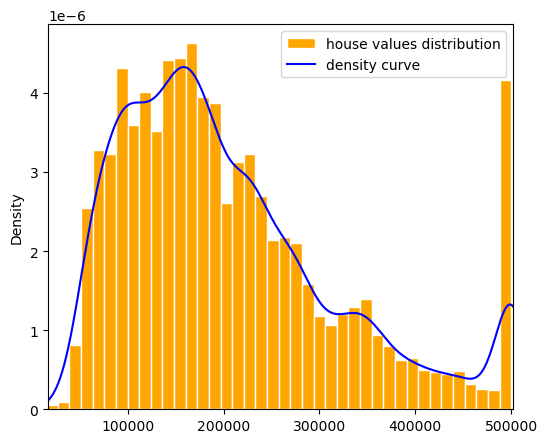

In [7]:
plt.figure(figsize=(6,5))
plt.hist(x=data_cleaned_na.median_house_value,
         label="house values distribution",
         color='orange',edgecolor='white',
         density=1,
         bins=40,
        range=(data_cleaned_na.median_house_value.min(),data_cleaned_na.median_house_value.max()))
plt.xlim(data_cleaned_na.median_house_value.min()+2000,data_cleaned_na.median_house_value.max()+2000)
data_cleaned_na.median_house_value.plot.kde(color='blue',label='density curve')
plt.legend()
plt.show()

In [8]:
Q1 = data_cleaned_na['median_house_value'].quantile(0.25)
Q3 = data_cleaned_na['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
outliers = data_cleaned_na[(data_cleaned_na['median_house_value'] < Q1 - 1.5*IQR) | (data_cleaned_na['median_house_value'] > Q3 + 1.5*IQR)]
display("outliers minimum: ",outliers['median_house_value'].min())
print("\n")
display("outliers shape: ", outliers.shape)

'outliers minimum: '

np.float64(482700.0)

'outliers shape: '

(1064, 10)

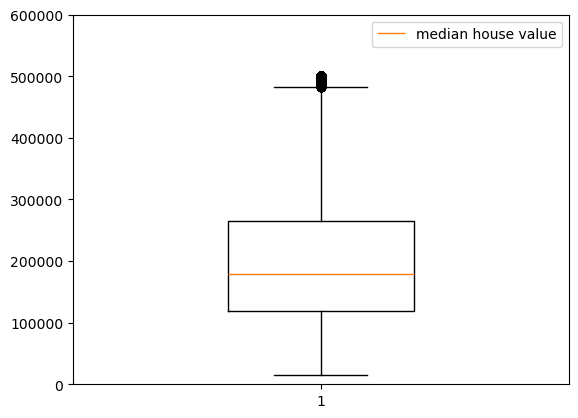

In [9]:
plt.boxplot(data_cleaned_na.median_house_value,label="median house value")
plt.xlim(0.8,1.2)
plt.ylim(-0.5,600000)
plt.legend()
plt.show()

In [10]:
dropping_outliers_condition=~((data_cleaned_na['median_house_value'] < Q1 - 1.5*IQR) | (data_cleaned_na['median_house_value'] > Q3 + 1.5*IQR))
#Now we retrieve the new Dataset without outliers
data_cleaned_outliers=data_cleaned_na[dropping_outliers_condition]
print("Old Dataset with outliers shape: \n",data_cleaned_na.shape)
print("new Dataset without outliers shape: \n",data_cleaned_outliers.shape)


Old Dataset with outliers shape: 
 (20433, 10)
new Dataset without outliers shape: 
 (19369, 10)


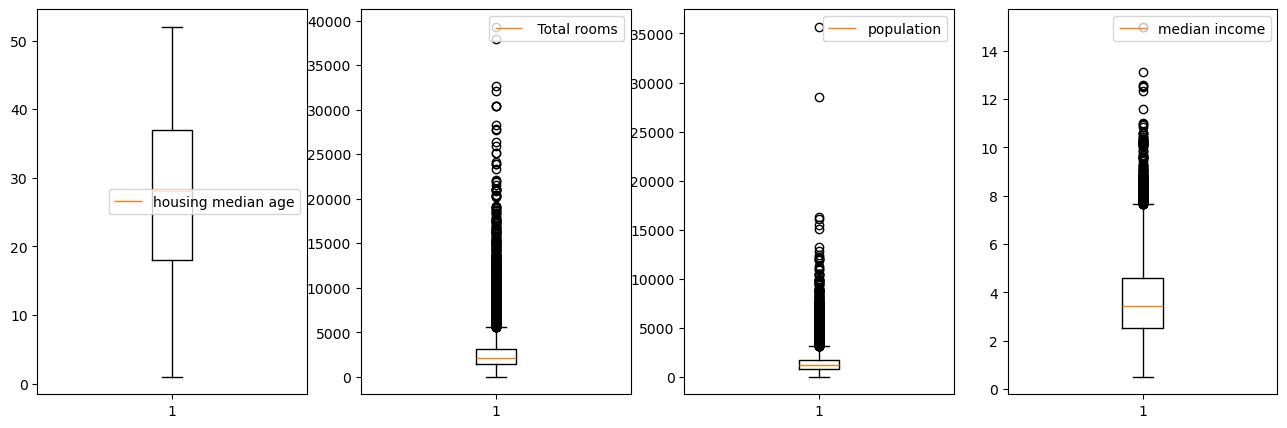

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plt.boxplot(data_cleaned_outliers.housing_median_age,label="housing median age",)
plt.legend()
plt.subplot(1,4,2)
plt.boxplot(data_cleaned_outliers.total_rooms,label=" Total rooms")
plt.legend()
plt.subplot(1,4,3)
plt.boxplot(data_cleaned_outliers.population,label="population")
plt.legend()
plt.subplot(1,4,4)
plt.boxplot(data_cleaned_outliers.median_income,label="median income")
plt.legend()
plt.show()

<p>Here again we can see that the median income contains several outliers</p>
<p>We'll estimate the percentage of outliers and try to see if removing them won't affect hugely our samples size</p>
<p>It will depend on the IQR, the lower and the upper bound</p>

In [12]:
Q1_median_income=data_cleaned_outliers.median_income.quantile(0.25)
Q3_median_income=data_cleaned_outliers.median_income.quantile(0.75)
IQR_median_income=Q3_median_income-Q1_median_income
lower_limt=Q1_median_income-1.5*IQR_median_income
upper_limit=Q3_median_income+1.5*IQR_median_income
data_cleaned_outliers_2=data_cleaned_outliers[(data_cleaned_outliers.median_income>=lower_limt) & (data_cleaned_outliers.median_income<=upper_limit) ]

In [13]:
print("old datset with median income outlier shape: ",data_cleaned_outliers.shape)
print("New datset without median income outlier shape: ",data_cleaned_outliers_2.shape)

old datset with median income outlier shape:  (19369, 10)
New datset without median income outlier shape:  (19026, 10)


<p>Now we have a cleaner dataset we can move to the next step</p>
<p>Which variable explains the most median_house values???</p>

## Checking for relations between variables
<p>We'll try to find which variable impacts the most our depedant variable</p>
<p>We'll plot an annoted correlation matrix for this purpose</p>

In [14]:
data_cleaned_outliers_2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19026.000000,19026.000000,19026.000000,19026.000000,19026.000000,19026.000000,19026.000000,19026.000000,19026.000000
mean,-119.565679,35.661649,28.477452,2605.424577,541.089457,1443.308946,502.134921,3.576909,187426.479344
std,2.005440,2.154703,12.470392,2161.773947,422.388034,1141.842312,382.853418,1.414955,92355.580178
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.750000,33.930000,18.000000,1436.000000,298.000000,799.000000,282.000000,2.506850,115000.000000
50%,-118.510000,34.270000,29.000000,2102.000000,438.000000,1182.000000,412.000000,3.401300,170800.000000
75%,-118.000000,37.730000,37.000000,3107.000000,650.000000,1747.000000,607.000000,4.500000,241700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,7.647300,482200.000000


<Axes: >

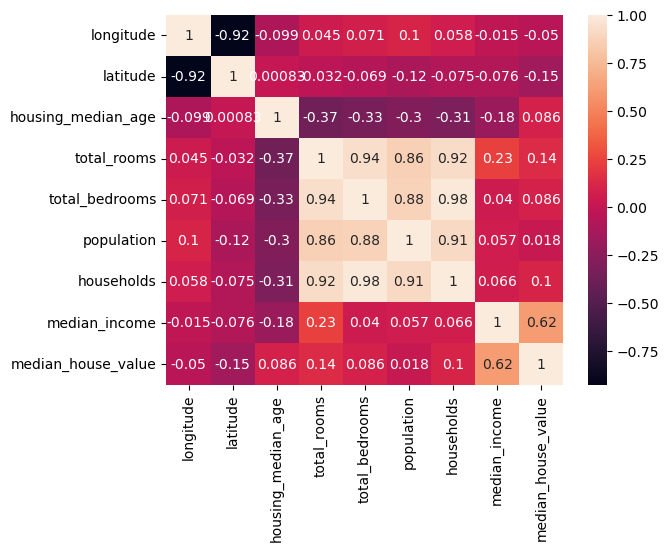

In [15]:
sns.heatmap(data_cleaned_outliers_2.corr(numeric_only=True),annot=True)

### Explaining correlations
<p> We can properly see that there are independent variables highly correlated. We have to remove them,but why? Because if they're highly and positively correlated, they may represents similar type of information or just the same information.That wouldn't be very useful for our model.(Multicolinearity phenomenon)</p>
<p>It's like having duplicates not on rows this time ,but on features(columns).</p>
<p>In fact that might seem a bit logic. For example the correlation coefficient between total_rooms and total_bedrooms is 0.94 which is great. But when we count rooms we also include bedrooms. So it's a kinda duplicate. Same for population and households. Households are part of population</p>
<p>By removing this features,we'll drop those who have a weaker correlation with the target variable</p>

In [16]:
data_cleaned_after_correlations=data_cleaned_outliers_2.drop(columns=['total_bedrooms','population'],axis=1)
data=data_cleaned_after_correlations
print(data.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'households', 'median_income', 'median_house_value', 'ocean_proximity'],
      dtype='object')


## Transform categorical variables
<p>Linear regression models can only process numbers while training. But sometimes,It may happen we have categorical variables in our dataset which can have a Huge impact on our model performance. Depending on the context, there are multiple techniques we can use to convert them into numerical variables. The one we 'll use here will involve the use of dummy variables.</p>

In [17]:
dummy_oceanproximity=pd.get_dummies(data,prefix='oc_proxim',prefix_sep="_",columns=["ocean_proximity"],drop_first=False,
                                   dtype='int64')
print("New dataset with Ocean proximity features\n")
display(dummy_oceanproximity.head())
data=dummy_oceanproximity


New dataset with Ocean proximity features



,longitude,latitude,housing_median_age,total_rooms,households,median_income,median_house_value,oc_proxim_<1H OCEAN,oc_proxim_INLAND,oc_proxim_ISLAND,oc_proxim_NEAR BAY,oc_proxim_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,193.0,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,514.0,3.6591,299200.0,0,0,0,1,0


In [18]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'households', 'median_income', 'median_house_value',
       'oc_proxim_<1H OCEAN', 'oc_proxim_INLAND', 'oc_proxim_ISLAND',
       'oc_proxim_NEAR BAY', 'oc_proxim_NEAR OCEAN'],
      dtype='object')

<p>We said earlier that we need to stay away from multicolinearity</p>
<p>So we'll need to drop one of the categories columns(same as using the `drop_first` attribute in `get_dummies()` function) to get k-1 features and solve that risk</p>
<p>Let's drop oc_proxim_INLAND</p>

In [19]:
data.drop(columns=['oc_proxim_INLAND'],inplace=True,axis=1)
print("New columns: ",data.columns)

New columns:  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'households', 'median_income', 'median_house_value',
       'oc_proxim_<1H OCEAN', 'oc_proxim_ISLAND', 'oc_proxim_NEAR BAY',
       'oc_proxim_NEAR OCEAN'],
      dtype='object')


In [20]:
#don't forget to shuffle the dataset
data=data.sample(frac=1).reset_index(drop=True)

## Split the data train/test

In [21]:
features=['longitude', 'latitude', 'housing_median_age', 'total_rooms','households', 'median_income','oc_proxim_<1H OCEAN', 'oc_proxim_ISLAND', 'oc_proxim_NEAR BAY','oc_proxim_NEAR OCEAN']
target=['median_house_value']

X=data[features]
y=data[target]

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

print("X train shape: ",X_train.shape[0])
print("X test shape: ",X_test.shape[0])

X train shape:  15220
X test shape:  3806


## Computing linear_Regression faur causal analysis
<p>We can use LinearREgression model from scikit-learn or statsmodels.api</p>
<p>Use scikit-learn if we want to be simple, but if we want or need information about p-values,t-test,standard errors,sumarries.. </p>

### With statsmodels.api
<p>We nove before instanciating our model, to add a column of ones(1) in our dataset for biaises(different from training loss). By default  statsmodels doesn't add automatically the intercept. So we'll use the statsmodels library to add the constants column. That column column is often materialized by $W_0$ or $B_0$ when we have an equation like $B_0+B_1 X_1+B_2 X_2$</p>

In [26]:
import statsmodels.api as sm
# adding the column of Ones to X training set
X_train_constant=sm.add_constant(X_train)
# fitting the model with the Ordinary Least Square
# bonus:the OLS method has also the ability to drop Nan Values if the 'missing' attribute is specified
model_fitted=sm.OLS(endog=y_train,exog=X_train_constant).fit()
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     1992.
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:22:56   Log-Likelihood:            -1.8924e+05
No. Observations:               15220   AIC:                         3.785e+05
Df Residuals:                   15209   BIC:                         3.786e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.788e+06 

<p>P-value says what is this probability that you've obtained too high of a statistical tests given that this is just by a random chance</p>

### predictions with statsmodels.api

In [27]:
X_test_constant=sm.add_constant(X_test)
predictions=model_fitted.predict(exog=X_test_constant)
print(predictions[:18])

2141     281049.671620
18716    282193.000527
980      133486.419424
326      275810.797886
8398     248550.196533
5687     116006.910296
15570    272634.960966
5557     254778.226330
11368    262259.693178
14528    166398.049139
13228    276102.269075
4702     170390.495367
14148    260658.142513
14575    217010.771510
16700    174032.362084
467      117461.403029
6909      79505.100100
11877    238089.288588
dtype: float64


In [35]:
#difference
np.mean((predictions.values-y_test.values)**2)

np.float64(13144897098.5959)

## Check OLS assumptions

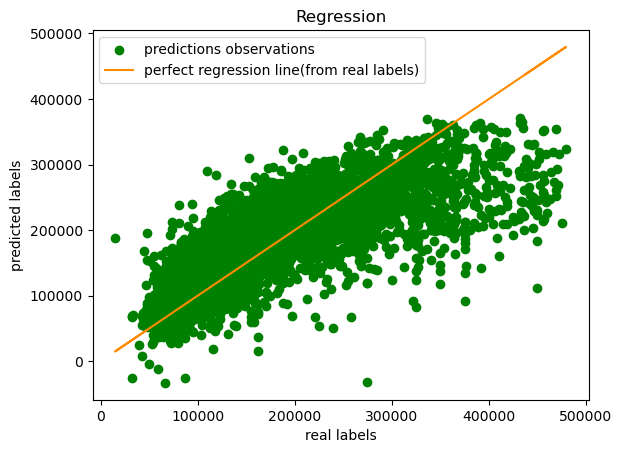

In [37]:
plt.scatter(y_test,predictions,color='green',label="predictions observations")
plt.plot(y_test,y_test,label="perfect regression line(from real labels)",color='darkorange')
plt.title("Regression")
plt.legend()
plt.xlabel("real labels")
plt.ylabel("predicted labels")
plt.show()

In [38]:
# residuas==the smae as the error for each sample
residuas=np.mean(model_fitted.resid)
residuas

np.float64(7.306705944915639e-09)

## Computing Linear Regression for predictive analysis
<p>Using sklearn.LinearRegression() this time</p>
<p>Before any computation let's first scale our data. We'll use the standard scaler</p>

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [52]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [53]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)
predictions_sk=model.predict(X_test_scaled)
print(predictions[:10])

2141     281049.671620
18716    282193.000527
980      133486.419424
326      275810.797886
8398     248550.196533
5687     116006.910296
15570    272634.960966
5557     254778.226330
11368    262259.693178
14528    166398.049139
dtype: float64


In [54]:
MSE=mean_squared_error(y_pred=predictions_sk,y_true=y_test)
MAE=mean_absolute_error(y_pred=predictions_sk,y_true=y_test)
print("Mean squared error: ",MSE)
print("\n")
print("Mean Absolute Error: ",MAE)

Mean squared error:  3841902599.2086825


Mean Absolute Error:  46408.63093513087


In [64]:
from math import sqrt
sqrt(MSE)

61983.083169592996

In [65]:
r2_score(y_true=y_test,y_pred=predictions_sk)

0.550733326869935

## Improvement techniques
<ul>
    <li>Ridge or lasso regression</li>
    <li>Removing more outliers from other features</li>
    <li>Feature Engineering</li>
    <li>GMM/GLS</li>
    <li>Other ML algorithms (like Random Forest for example)</li>
</ul>